# Regression - G3.2

## 1. Dataset Analysis
Load datasets via the scikit-learn library. The datasets can be downloaded using the fetch_openml function by indicating the name of the dataset as a parameter. In addition, organise the downloaded data in a pandas DataFrame, and display the first rows to gain an overview of the available variables.

In [55]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Load dataset using fetch_openml
meta = fetch_openml(name='meta', version=1, parser='auto')
california_housing = fetch_openml(name='california_housing', version=7, parser='auto')
kin8nm = fetch_openml(name='kin8nm', version=1, parser='auto')
chscase_census2 = fetch_openml(name='chscase_census2', version=1, parser='auto')

### 1.1 Meta
Source Link: https://openml.org/search?type=data&status=active&id=566

In [2]:
# We extract data, labels and feature names from the META Dataset
data_meta = meta.data
target_meta = meta.target
feature_names_meta = meta.feature_names
description_meta = meta.DESCR

# Now you can use data, labels and dataset information as needed
print("Dati:")
print(data_meta)
print("\nLabel:")
print(target_meta)
print("\nNomi delle feature:")
print(feature_names_meta)
print("\nDescrizione del dataset:")
print(description_meta)

# DataFrame creation with Pandas
df_meta = pd.DataFrame(data_meta, columns=feature_names_meta)
df_meta['target'] = target_meta
print(df_meta.head())

Dati:
         DS_Name    T    N   p  k  Bin  Cost  SDratio  correl  cancor1  ...  \
0    Aust_Credit  690  690  14  2    4     0   1.2623  0.1024   0.7713  ...   
1    Aust_Credit  690  690  14  2    4     0   1.2623  0.1024   0.7713  ...   
2    Aust_Credit  690  690  14  2    4     0   1.2623  0.1024   0.7713  ...   
3    Aust_Credit  690  690  14  2    4     0   1.2623  0.1024   0.7713  ...   
4    Aust_Credit  690  690  14  2    4     0   1.2623  0.1024   0.7713  ...   
..           ...  ...  ...  .. ..  ...   ...      ...     ...      ...  ...   
523      Vehicle  846  846  18  4    0     0   1.5392  0.4828   0.8420  ...   
524      Vehicle  846  846  18  4    0     0   1.5392  0.4828   0.8420  ...   
525      Vehicle  846  846  18  4    0     0   1.5392  0.4828   0.8420  ...   
526      Vehicle  846  846  18  4    0     0   1.5392  0.4828   0.8420  ...   
527      Vehicle  846  846  18  4    0     0   1.5392  0.4828   0.8420  ...   

     fract1  fract2  skewness  kurtosis      

### 1.2 California_Housing 
Source Link: https://openml.org/search?type=data&status=active&id=44977&sort=runs

In [3]:
# We extract data, labels and feature names from the CALIFORNIA HOUSING Dataset
data_ch = california_housing.data
target_ch = california_housing.target
feature_names_ch = california_housing.feature_names
description_ch = california_housing.DESCR

# Now you can use data, labels and dataset information as needed
print("Dati:")
print(data_ch)
print("\nLabel:")
print(target_ch)
print("\nNomi delle feature:")
print(feature_names_ch)
print("\nDescrizione del dataset:")
print(description_ch)

# DataFrame creation with Pandas
df_ch = pd.DataFrame(data_ch, columns=feature_names_ch)
df_ch['target'] = target_ch
print(df_ch.head())

Dati:
       longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0        -122.23     37.88                41         880            129   
1        -122.22     37.86                21        7099           1106   
2        -122.24     37.85                52        1467            190   
3        -122.25     37.85                52        1274            235   
4        -122.25     37.85                52        1627            280   
...          ...       ...               ...         ...            ...   
20635    -121.09     39.48                25        1665            374   
20636    -121.21     39.49                18         697            150   
20637    -121.22     39.43                17        2254            485   
20638    -121.32     39.43                18        1860            409   
20639    -121.24     39.37                16        2785            616   

       population  households  medianIncome  
0             322         126        8.3252  
1

### 1.3 Kin8nm
Source Link: https://openml.org/search?type=data&id=189&sort=runs&status=active

In [4]:
# We extract data, labels and feature names from the KIN8NM Dataset
data_kin8nm = kin8nm.data
target_kin8nm = kin8nm.target
feature_names_kin8nm = kin8nm.feature_names
description_kin8nm = kin8nm.DESCR

# Now you can use data, labels and dataset information as needed
print("Dati:")
print(data_kin8nm)
print("\nLabel:")
print(target_kin8nm)
print("\nNomi delle feature:")
print(feature_names_kin8nm)
print("\nDescrizione del dataset:")
print(description_kin8nm)

# DataFrame creation with Pandas
df_kin8nm = pd.DataFrame(data_kin8nm, columns=feature_names_kin8nm)
df_kin8nm['target'] = target_kin8nm
print(df_kin8nm.head())

Dati:
        theta1    theta2    theta3    theta4    theta5    theta6    theta7  \
0    -0.015119  0.360741  0.469398  1.309675  0.988024 -0.025493  0.664071   
1     0.360478 -0.301395  0.629183 -1.440146 -0.741637 -1.196749 -1.038444   
2     1.563238 -1.294753  0.078987  1.432937  1.149136 -1.292140  1.562988   
3     0.199485  0.901157 -1.356304 -0.080525 -0.976628  0.829894 -0.855649   
4     0.659737  0.120552 -0.008756  0.648839  0.626832 -0.646539  1.318074   
...        ...       ...       ...       ...       ...       ...       ...   
8187  1.459523 -0.201551 -0.610721  1.424181  0.269273  1.172781 -0.509818   
8188  0.654980 -0.823516 -0.809246  0.408441 -1.368838  0.582222 -1.394697   
8189  0.103862  1.024329 -1.047221  0.280905 -0.181155 -0.651934 -1.241842   
8190 -1.109311 -0.027690 -1.448736 -0.648566 -0.462142  0.814971  1.100615   
8191  1.155010 -0.429331 -1.567260  0.883077 -1.203777 -0.126506  0.331042   

        theta8  
0     0.062763  
1    -0.717461  
2    -

### 1.4 Cshcase_Census2
Source Link: https://openml.org/search?type=data&id=673&sort=runs&status=active

In [5]:
# We extract data, labels and feature names from the CHSCASE_CENSUS2 Dataset
data_chcc2 = chscase_census2.data
target_chcc2 = chscase_census2.target
feature_names_chcc2 = chscase_census2.feature_names
description_chcc2 = chscase_census2.DESCR

# Now you can use data, labels and dataset information as needed
print("Dati:")
print(data_chcc2)
print("\nLabel:")
print(target_chcc2)
print("\nNomi delle feature:")
print(feature_names_chcc2)
print("\nDescrizione del dataset:")
print(description_chcc2)

# DataFrame creation with Pandas
df_chcc2 = pd.DataFrame(data_chcc2, columns=feature_names_chcc2)
df_chcc2['target'] = target_chcc2
print(df_chcc2.head())

Dati:
      col_1    col_2    col_3    col_4    col_5    col_6    col_7
0    16.754  21.7430  16.0140  19.5413  17.5730  20.0110  19.3907
1    17.419  15.2250  12.5705  25.0069  20.4635  18.7705  19.4249
2    42.063  15.7570  30.8815  16.1605  20.8111  19.0999  19.5469
3    15.907  24.8285  16.0473  15.4880  23.9404  19.7499  18.7775
4    35.787  20.1530  21.5765  21.0381  20.6379  20.7242  18.6020
..      ...      ...      ...      ...      ...      ...      ...
395  13.232  21.6985  17.8110  15.5863  22.8264  18.3119  20.1592
396  15.632  17.8920  23.2730  21.8106  17.0332  19.9000  18.8605
397  45.271  18.7130  24.6893  14.7660  20.0488  20.6509  19.6883
398   9.431  32.3505  13.5570  17.7773  20.5473  18.7909  20.2040
399  10.631  12.2660  19.2515  20.7928  18.5736  20.6123  18.6656

[400 rows x 7 columns]

Label:
0      19.2227
1      19.7238
2      20.5771
3      20.2231
4      20.4897
        ...   
395    19.8959
396    20.3573
397    19.9983
398    20.2885
399    20.6079
Name:

## 2. Preprocessing

### 2.1 Meta

In [6]:
# Delete nominal features (if any)
df_meta = df_meta.select_dtypes(exclude=['category'])

# Explore dataset for missing values
missing_values_meta = df_meta.isnull().sum()
print("\n\nMissing Values:")
print(missing_values_meta)

# We interpolate the missing data
df_meta = df_meta.interpolate(method='cubicspline', limit_direction='both', axis=0)

# We standardising the values within the Dataset
numeric_cols_meta = df_meta.select_dtypes(include=['float64', 'int64']).columns
df_meta[numeric_cols_meta] = StandardScaler().fit_transform(df_meta[numeric_cols_meta])

print("\n\nDataFrame after interpolation and standardisation:")
print(df_meta)



Missing Values:
T             0
N             0
p             0
k             0
Bin           0
Cost          0
SDratio       0
correl       24
cancor1       0
cancor2     240
fract1        0
fract2      240
skewness      0
kurtosis      0
Hc            0
Hx            0
MCx           0
EnAtr         0
NSRatio       0
target        0
dtype: int64


DataFrame after interpolation and standardisation:
            T         N         p         k       Bin     Cost   SDratio  \
0   -0.696059 -0.705657 -0.431747 -0.408597  0.090122 -0.39736 -0.337108   
1   -0.696059 -0.705657 -0.431747 -0.408597  0.090122 -0.39736 -0.337108   
2   -0.696059 -0.705657 -0.431747 -0.408597  0.090122 -0.39736 -0.337108   
3   -0.696059 -0.705657 -0.431747 -0.408597  0.090122 -0.39736 -0.337108   
4   -0.696059 -0.705657 -0.431747 -0.408597  0.090122 -0.39736 -0.337108   
..        ...       ...       ...       ...       ...      ...       ...   
523 -0.668066 -0.694697 -0.320654 -0.302843 -0.350473 -0.39736  

### 2.2 California_Housing

In [7]:
# Delete nominal features (if any)
df_ch = df_ch.select_dtypes(exclude=['object'])

# Explore dataset for missing values
missing_values_ch = df_ch.isnull().sum()
print("Missing Values:")
print(missing_values_ch)

# We standardising the values within the Dataset
numeric_cols_ch = df_ch.select_dtypes(include=['float64', 'int64']).columns
df_ch[numeric_cols_ch] = StandardScaler().fit_transform(df_ch[numeric_cols_ch])

print("\n\nDataFrame after interpolation and standardisation:")
print(df_ch)

Missing Values:
longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
target              0
dtype: int64


DataFrame after interpolation and standardisation:
       longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0      -1.327835  1.052548          0.982143   -0.804819      -0.970706   
1      -1.322844  1.043185         -0.607019    2.045890       1.348649   
2      -1.332827  1.038503          1.856182   -0.535746      -0.825895   
3      -1.337818  1.038503          1.856182   -0.624215      -0.719067   
4      -1.337818  1.038503          1.856182   -0.462404      -0.612239   
...          ...       ...               ...         ...            ...   
20635  -0.758826  1.801647         -0.289187   -0.444985      -0.389087   
20636  -0.818722  1.806329         -0.845393   -0.888704      -0.920853   
20637  -0.823713  1.778237         -0.924851 

### 2.3 Kin8nm

In [8]:
# Delete nominal features (if any)
df_kin8nm = df_kin8nm.select_dtypes(exclude=['object'])

# Explore dataset for missing values
missing_values_kin8nm = df_kin8nm.isnull().sum()
print("Missing Values:")
print(missing_values_kin8nm)

# We standardising the values within the Dataset
numeric_cols_kin8nm = df_kin8nm.select_dtypes(include=['float64', 'int64']).columns
df_kin8nm[numeric_cols_kin8nm] = StandardScaler().fit_transform(df_kin8nm[numeric_cols_kin8nm])

print("\n\nDataFrame after interpolation and standardisation:")
print(df_kin8nm)

Missing Values:
theta1    0
theta2    0
theta3    0
theta4    0
theta5    0
theta6    0
theta7    0
theta8    0
target    0
dtype: int64


DataFrame after interpolation and standardisation:
        theta1    theta2    theta3    theta4    theta5    theta6    theta7  \
0    -0.027045  0.408206  0.495838  1.470998  1.080853 -0.017296  0.720778   
1     0.388066 -0.326324  0.673237 -1.587312 -0.826540 -1.299900 -1.150800   
2     1.717359 -1.428292  0.062390  1.608088  1.258521 -1.404359  1.708960   
3     0.210136  1.007708 -1.531122 -0.075161 -1.085679  0.919408 -0.949853   
4     0.718808  0.141756 -0.035026  0.736026  0.682547 -0.697384  1.439725   
...        ...       ...       ...       ...       ...       ...       ...   
8187  1.602734 -0.215564 -0.703349  1.598350  0.288246  1.294892 -0.569681   
8188  0.713550 -0.905532 -0.923759  0.468659 -1.518190  0.648191 -1.542429   
8189  0.104454  1.144348 -1.187967  0.326815 -0.208465 -0.703292 -1.374396   
8190 -1.236348 -0.022694 -1.63

### 2.4 Cshcase_Census2

In [9]:
# Delete nominal features (if any)
df_chcc2 = df_chcc2.select_dtypes(exclude=['object'])

# Explore dataset for missing values
missing_values_chcc2 = df_chcc2.isnull().sum()
print("Missing Values:")
print(missing_values_chcc2)

# We standardising the values within the Dataset
numeric_cols_chcc2 = df_chcc2.select_dtypes(include=['float64', 'int64']).columns
df_chcc2[numeric_cols_chcc2] = StandardScaler().fit_transform(df_chcc2[numeric_cols_chcc2])

print("\n\nDataFrame after interpolation and standardisation:")
print(df_chcc2)

Missing Values:
col_1     0
col_2     0
col_3     0
col_4     0
col_5     0
col_6     0
col_7     0
target    0
dtype: int64


DataFrame after interpolation and standardisation:
        col_1     col_2     col_3     col_4     col_5     col_6     col_7  \
0   -0.308120  0.157111 -0.626437 -0.080242 -1.019344  0.157575 -0.352838   
1   -0.256593 -0.577594 -1.265018  1.186658  0.280580 -0.601668 -0.324252   
2    1.652948 -0.517627  2.130671 -0.863895  0.436904 -0.400060 -0.222279   
3   -0.373750  0.504907 -0.620262 -1.019777  1.844222 -0.002230 -0.865379   
4    1.166652 -0.022113  0.405102  0.266709  0.359012  0.594087 -1.012069   
..        ...       ...       ...       ...       ...       ...       ...   
395 -0.581022  0.152095 -0.293192 -0.996991  1.343231 -0.882353  0.289509   
396 -0.395058 -0.276971  0.719710  0.445771 -1.262105  0.089638 -0.796003   
397  1.901519 -0.184429  0.982356 -1.187133  0.094080  0.549224 -0.104091   
398 -0.875543  1.352783 -1.082077 -0.489128  0.31826

## 3. Regression
First of all, let us start by defining some main functions that are fundamental to the third step:

#### SMAPE
In this case, we implemented a special function, which takes two arrays, one for real values and one for predicted values, and returns the SMAPE according to the formula given in the course slides.

In [56]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

#### EVALUATION OF MODELS
In this case, we felt it necessary and necessary for the cleanliness of the code to create a function that can be called up several times within the code to calculate the results obtained by applying the different regression models required.

In [57]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_test, y_test)
    smape_score = smape(y_test, y_pred)

    print(f"Results for {model_name}:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}%")
    print(f"SMAPE: {smape_score}%\n")

    return mae, rmse, mape, smape_score

#### CHART PLOT
Again, we found it necessary to create a function that plots all graphs for a single dataset to keep the code clean.

In [58]:
def plot_results(model_names, mae_scores, rmse_scores, mape_scores, smape_scores):
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Chart Plots of Evaluation Metrics Results')

    # MAE
    axs[0, 0].bar(model_names, mae_scores, color='blue')
    axs[0, 0].set_title('MAE')
    axs[0, 0].set_ylabel('Mean Absolute Error')

    # RMSE
    axs[0, 1].bar(model_names, rmse_scores, color='orange')
    axs[0, 1].set_title('RMSE')
    axs[0, 1].set_ylabel('Root of Mean Square Error')

    # MAPE
    axs[1, 0].bar(model_names, mape_scores, color='green')
    axs[1, 0].set_title('MAPE')
    axs[1, 0].set_ylabel('Mean Absolute Percentage Error')

    # SMAPE
    axs[1, 1].bar(model_names, smape_scores, color='red')
    axs[1, 1].set_title('SMAPE')
    axs[1, 1].set_ylabel('Symmetric Mean Absolute Percentage Error')

    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### 3.1 Meta

Results for Linear Regression:
MAE: 9.015711395472986e-13
RMSE: 1.058023733549539e-12
MAPE: 0.0%
SMAPE: 3.7735849056986845%

Results for SVR:
MAE: 47.54984844939319
RMSE: 152.79803152570304
MAPE: 0.0%
SMAPE: 83.72004256256538%

Results for Decision Tree:
MAE: 1.6485754716981131
RMSE: 14.015471316262646
MAPE: 0.0%
SMAPE: 3.207553608156974%

Results for Random Forest:
MAE: 3.4734047169811317
RMSE: 19.640427202853772
MAPE: 0.0%
SMAPE: 5.342132403175247%

Results for Gradient Boosting:
MAE: 2.725597120496044
RMSE: 24.078197206601796
MAPE: 0.0%
SMAPE: 8.541988189184108%



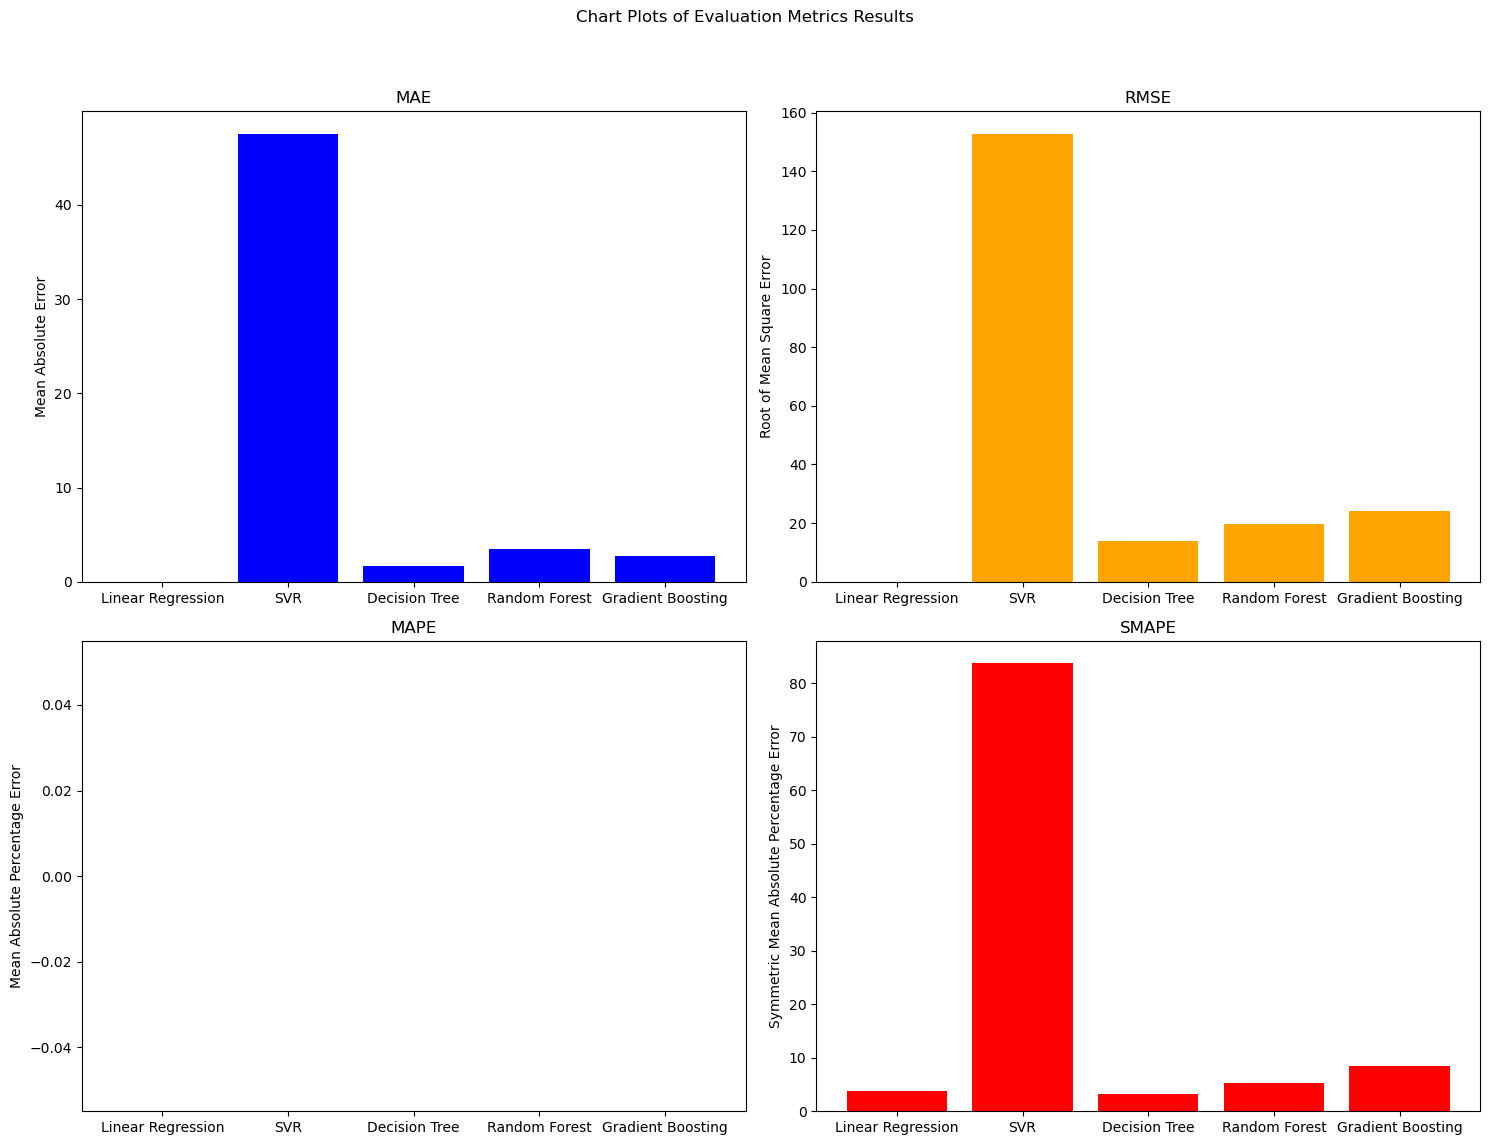

In [59]:
# Caricare i tuoi dati
# df è il DataFrame principale con le features e il target
# label è la Serie contenente il target
# Assumendo che il DataFrame sia chiamato df e la colonna target 'class'
# Nota: Seleziona solo le colonne necessarie per l'addestramento, escludendo eventuali colonne non utili o duplicati
features = df_meta
target = target_meta

# Division of the DataFrame into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialisation of models
linear_reg_model = LinearRegression()
svr_model = SVR()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()

# Evaluation of models for the META Dataset
models = [linear_reg_model, svr_model, decision_tree_model, random_forest_model, gradient_boosting_model]
model_names = ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

mae_scores = []
rmse_scores = []
mape_scores = []
smape_scores = []

# Visualisation of Chart Plots
for model, model_name in zip(models, model_names):
    mae, rmse, mape, smape_score = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    mape_scores.append(mape)
    smape_scores.append(smape_score)

plot_results(model_names, mae_scores, rmse_scores, mape_scores, smape_scores)

### 3.2 California_Housing

Results for Linear Regression:
MAE: 4.416689580818999e-11
RMSE: 6.243793570186005e-11
MAPE: 2.852552742182925e-14%
SMAPE: 2.8525527421829255e-14%

Results for SVR:
MAE: 86690.49174193628
RMSE: 116482.36287676875
MAPE: 52.65148043077959%
SMAPE: 43.373777333760735%

Results for Decision Tree:
MAE: 21.366521317829456
RMSE: 99.86061142971376
MAPE: 0.016414965659921142%
SMAPE: 0.016862980277397268%

Results for Random Forest:
MAE: 18.005821220930233
RMSE: 75.1241028737273
MAPE: 0.018330963388315642%
SMAPE: 0.01774466595781486%

Results for Gradient Boosting:
MAE: 611.7565868294287
RMSE: 842.4288421835503
MAPE: 0.3798460010013492%
SMAPE: 0.37980240578579566%



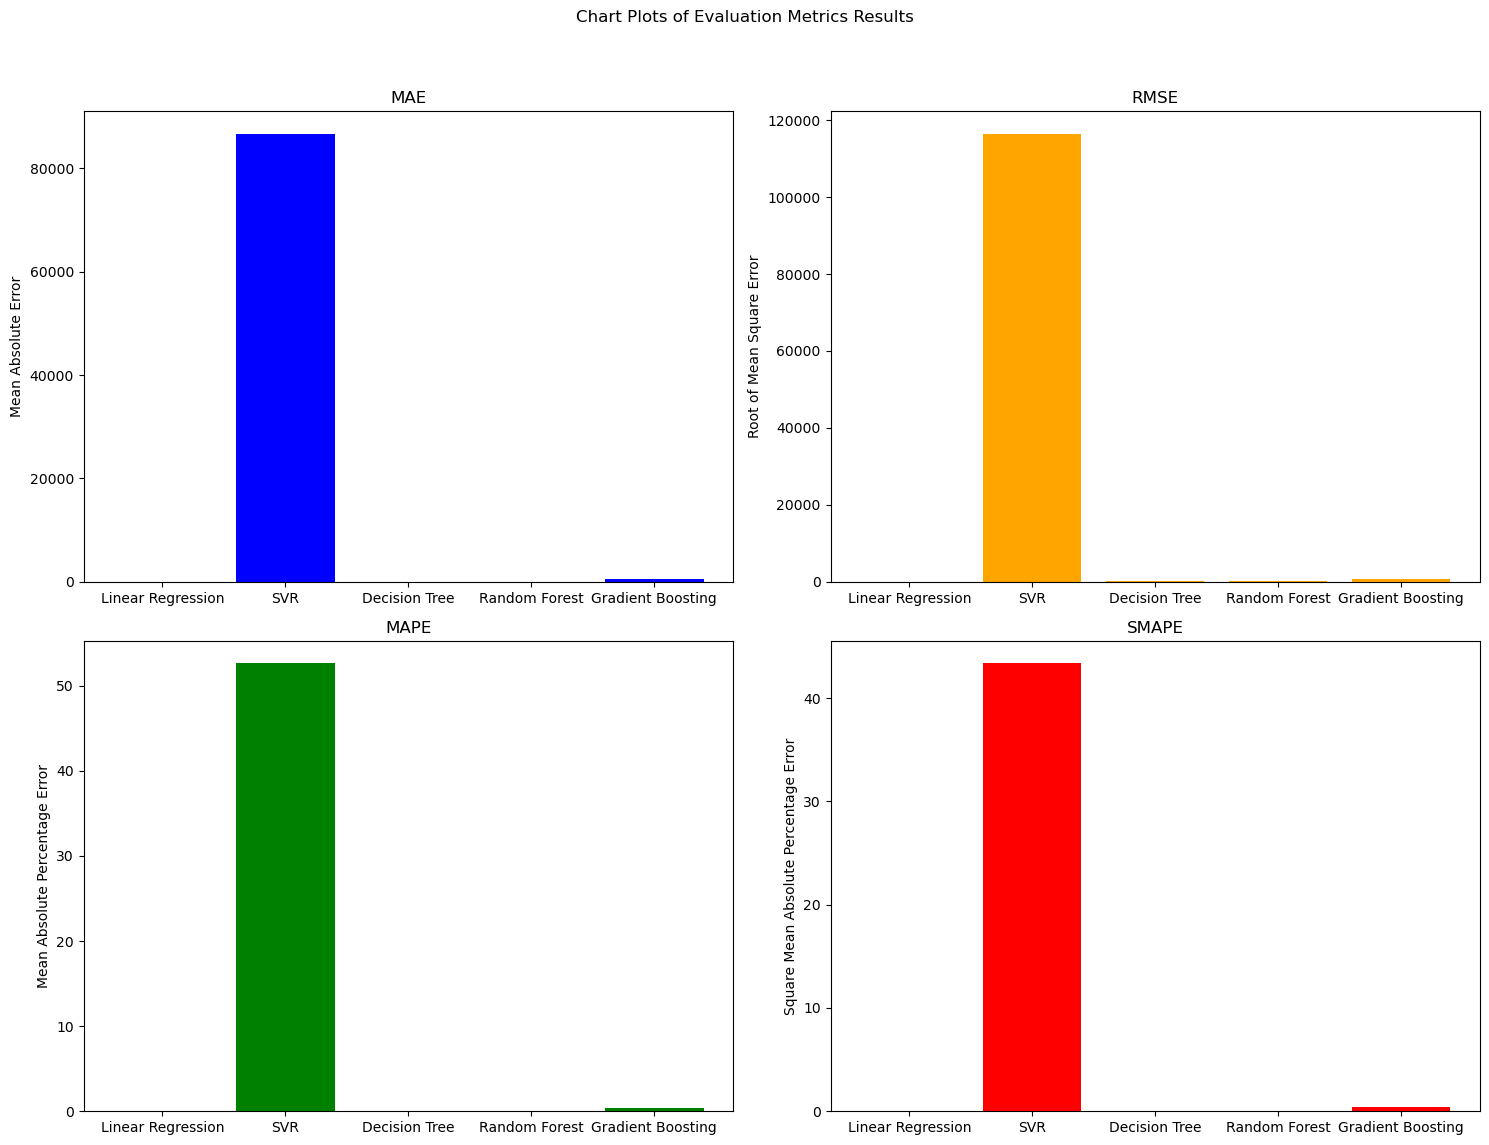

In [44]:
features = df_ch
target = target_ch

# Division of the DataFrame into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialisation of models
linear_reg_model = LinearRegression()
svr_model = SVR()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()

# Evaluation of models for the CALIFORNIA_HOUSING Dataset
models = [linear_reg_model, svr_model, decision_tree_model, random_forest_model, gradient_boosting_model]
model_names = ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

mae_scores = []
rmse_scores = []
mape_scores = []
smape_scores = []

# Visualisation of Chart Plots
for model, model_name in zip(models, model_names):
    mae, rmse, mape, smape_score = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    mape_scores.append(mape)
    smape_scores.append(smape_score)

plot_results(model_names, mae_scores, rmse_scores, mape_scores, smape_scores)

### 3.3 Kin8nm

Results for Linear Regression:
MAE: 1.451367668174177e-16
RMSE: 1.8255890429483152e-16
MAPE: 2.324254903557215e-14%
SMAPE: 2.3242549035572148e-14%

Results for SVR:
MAE: 0.03742048748667943
RMSE: 0.04597114422526152
MAPE: 6.615881904568701%
SMAPE: 6.557910367149435%

Results for Decision Tree:
MAE: 0.00029871407992678606
RMSE: 0.0009405245296462071
MAPE: 0.05857876716080691%
SMAPE: 0.058982512544659235%

Results for Random Forest:
MAE: 0.00016471896225341712
RMSE: 0.0005002996868878703
MAPE: 0.043041917542139305%
SMAPE: 0.043894947523499726%

Results for Gradient Boosting:
MAE: 0.0018007505332061373
RMSE: 0.002343476732033262
MAPE: 0.3047890792545484%
SMAPE: 0.3047058368036582%



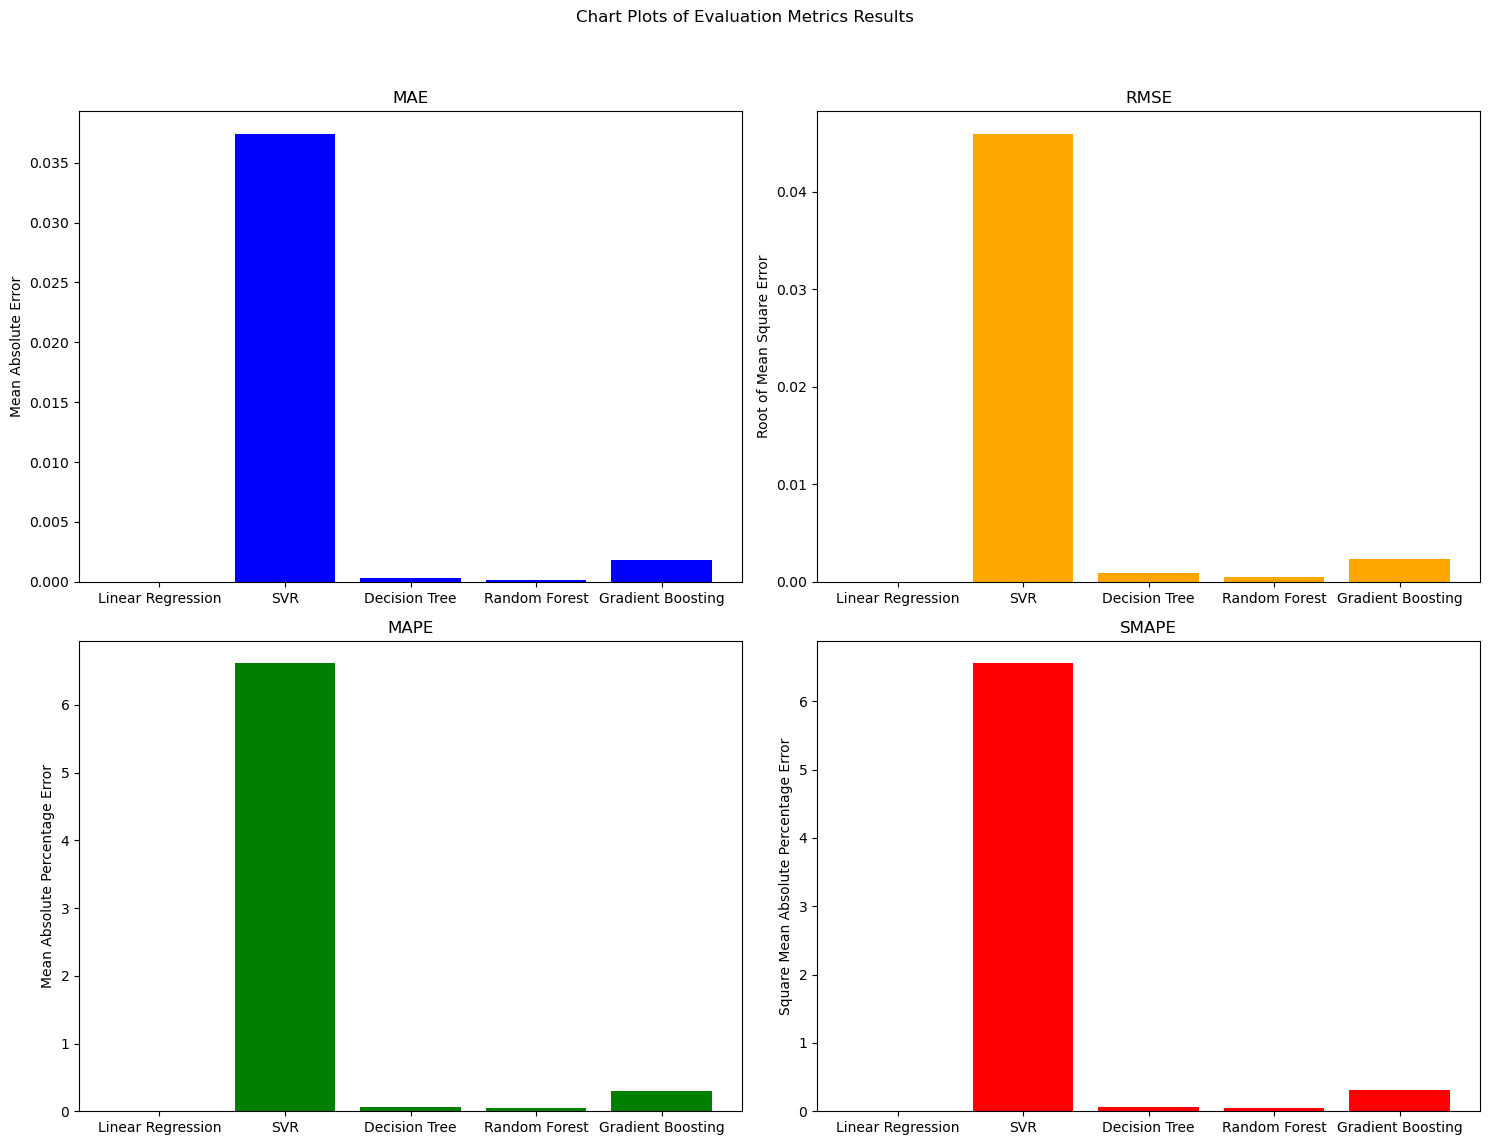

In [45]:
features = df_kin8nm
target = target_kin8nm

# Division of the DataFrame into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=91)

# Initialisation of models
linear_reg_model = LinearRegression()
svr_model = SVR()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()

# Evaluation of models for the KIN8NM Dataset
models = [linear_reg_model, svr_model, decision_tree_model, random_forest_model, gradient_boosting_model]
model_names = ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

mae_scores = []
rmse_scores = []
mape_scores = []
smape_scores = []

# Visualisation of Chart Plots
for model, model_name in zip(models, model_names):
    mae, rmse, mape, smape_score = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    mape_scores.append(mape)
    smape_scores.append(smape_score)

plot_results(model_names, mae_scores, rmse_scores, mape_scores, smape_scores)

### 3.4 Cshcase_Census2

Results for Linear Regression:
MAE: 3.552713678800501e-15
RMSE: 3.552713678800501e-15
MAPE: 1.7832627344411425e-14%
SMAPE: 1.7832627344411425e-14%

Results for SVR:
MAE: 0.1010855156364031
RMSE: 0.20083611264672943
MAPE: 0.5013477040193189%
SMAPE: 0.5036886396729677%

Results for Decision Tree:
MAE: 0.023636666666666736
RMSE: 0.08118287483617846
MAPE: 0.11433350701328736%
SMAPE: 0.1149372379847954%

Results for Random Forest:
MAE: 0.014625841666665806
RMSE: 0.056110388610680344
MAPE: 0.07113413126108886%
SMAPE: 0.0714432754392327%

Results for Gradient Boosting:
MAE: 0.01056930854073963
RMSE: 0.03600454323820159
MAPE: 0.051613349659148246%
SMAPE: 0.051740545068996446%



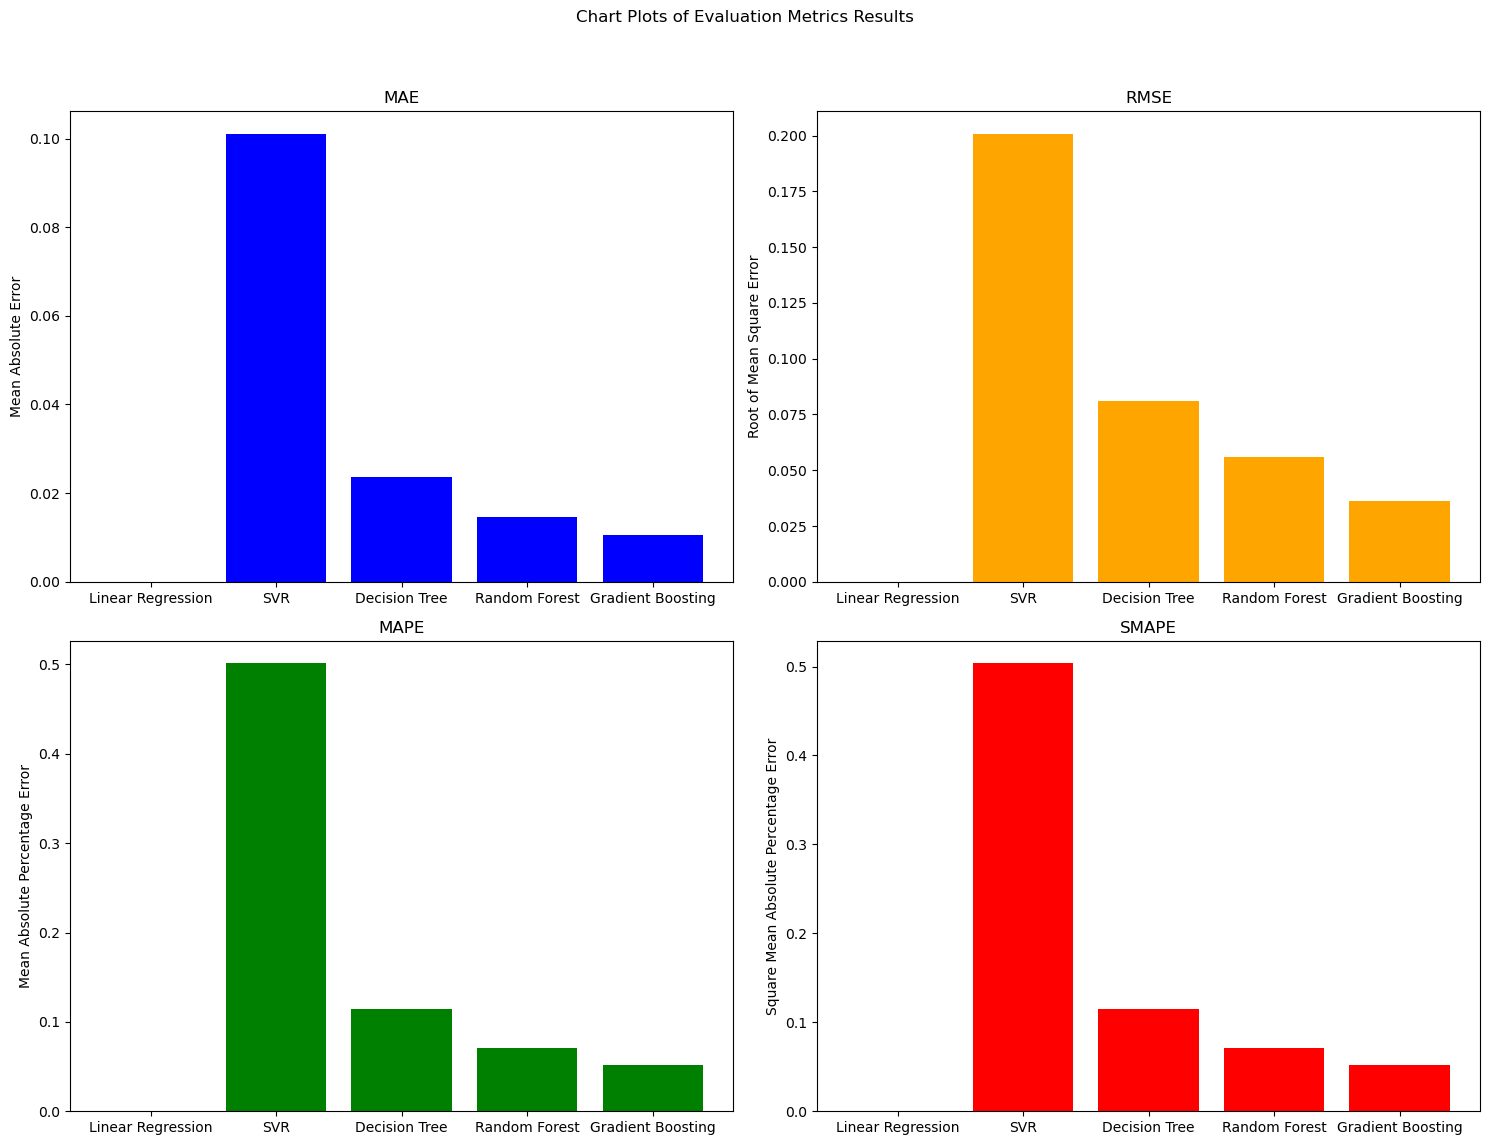

In [46]:
features = df_chcc2
target = target_chcc2

# Division of the DataFrame into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialisation of models
linear_reg_model = LinearRegression()
svr_model = SVR()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
gradient_boosting_model = GradientBoostingRegressor()

# Evaluation of models for the CSHCASE_CENSUS2 Dataset
models = [linear_reg_model, svr_model, decision_tree_model, random_forest_model, gradient_boosting_model]
model_names = ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

mae_scores = []
rmse_scores = []
mape_scores = []
smape_scores = []

# Visualisation of Chart Plots
for model, model_name in zip(models, model_names):
    mae, rmse, mape, smape_score = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    mape_scores.append(mape)
    smape_scores.append(smape_score)

plot_results(model_names, mae_scores, rmse_scores, mape_scores, smape_scores)